In [38]:
import csv
import numpy as np
import matplotlib.pyplot as plt

speeds = []
ammo = []
labels = []

with open("zombies_data.csv", "r") as f:
    reader = csv.reader(f)
    next(reader)  # skip header
    for row in reader:
        speeds.append(float(row[0]))
        ammo.append(float(row[1]))
        labels.append(int(row[2]))

X = np.column_stack((speeds, ammo))   # shape: (n_samples, 2)
y = np.array(labels).reshape(-1, 1)   # shape: (n_samples, 1)
n = len(X)

In [39]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

Xb = np.hstack((np.ones((n, 1)), X_norm))

In [40]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def compute_cost(Xb, y, w):
    z = Xb @ w
    h = sigmoid(z)
    eps = 1e-10
    return -(1/n)*np.sum(y*np.log(h+eps)+(1-y)*np.log(1-h+eps))

In [41]:
# w0 (bias), w1 (speed), w2 (ammo)
w = np.zeros((3, 1))
lr = 1e-3
epochs = 10000
cost_history = []
for i in range(epochs):
    z = Xb @ w
    h = sigmoid(z)
    grad = (1.0/n)*(Xb.T@(h - y))
    w = w - lr*grad
    cost = compute_cost(Xb, y, w)
    cost_history.append(cost)

print("Training complete.")
print("Final parameters:")
print("w0 (bias)      =", w[0, 0])
print("w1 (speed)     =", w[1, 0])
print("w2 (ammo)      =", w[2, 0])

Training complete.
Final parameters:
w0 (bias)      = 0.3956004420461611
w1 (speed)     = 1.5089314205257662
w2 (ammo)      = 1.1647908120442878


In [45]:
test_speed = 25.0
test_ammo = 1.0

test_norm = np.array([
                    (test_speed - X_mean[0]) / X_std[0],
                    (test_ammo  - X_mean[1]) / X_std[1]])

test_input = np.hstack(([1], test_norm))
survival_prob = sigmoid(test_input @ w)[0]

print("\nTest Runner: Speed = 25 km/h, Ammo = 1 clip")
print(f"Estimated survival probability: {survival_prob:.4f}")
if survival_prob >= 0.5:
    print("Prediction: SURVIVES (1)")
else:
    print("Prediction: INFECTED (0)")


Test Runner: Speed = 25 km/h, Ammo = 1 clip
Estimated survival probability: 0.8758
Prediction: SURVIVES (1)


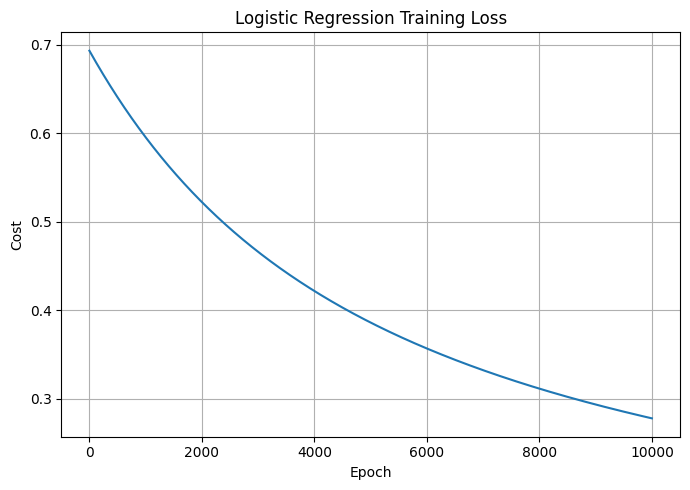

In [46]:
plt.figure(figsize=(7, 5))
plt.plot(cost_history)
plt.title("Logistic Regression Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.grid(True)
plt.tight_layout()
plt.show()

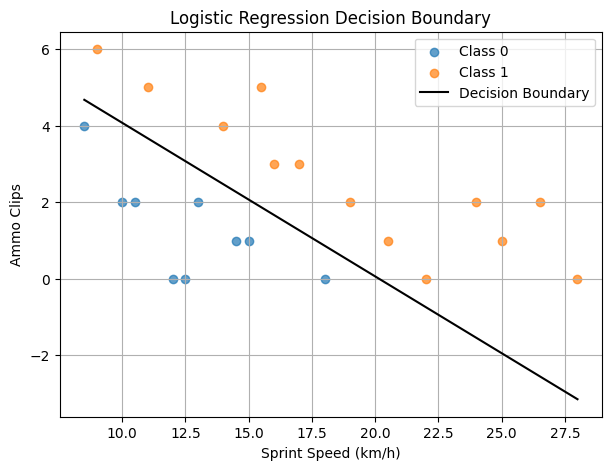

In [49]:
plt.figure(figsize=(7,5))

for label in [0,1]:
    idx = np.where(y.flatten() == label)
    plt.scatter(X[idx,0], X[idx,1], label=f"Class {label}", alpha=0.7)


x_vals = np.linspace(min(speeds), max(speeds), 100)
x_norm_vals = (x_vals - X_mean[0]) / X_std[0]

w0, w1, w2 = w.flatten()
ammo_norm_vals = -(w0 + w1*x_norm_vals) / (w2 + 1e-10)

ammo_vals = ammo_norm_vals * X_std[1] + X_mean[1]

plt.plot(x_vals, ammo_vals, color="black", label="Decision Boundary")

plt.xlabel("Sprint Speed (km/h)")
plt.ylabel("Ammo Clips")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()